# Trabalho avaliativo - Sistemas de controle II - 2023.2

**Leia com atenção as instruções abaixo**

*Informe na célula de código abaixo o seu número de matrícula:* 

***Não remova as aspas***

In [30]:
# Informe aqui sua matrícula
mat = '201733940032'

*Depois de informar os dados, execute o arquivo inteiro. Caso ocorra algum erro, peça ajuda ao professor*

*Resolva as questões abaixo, **justificando** todas as respostas. Utilize markdown para escrever texto e Python para fazer as contas. O trabalho é individual*

In [31]:
# 
# Não modifique esta célula! Você pode comprometer a sua avaliação.
from numpy.random import RandomState
from IPython.display import display, Math
from sympy import symbols, sin, cos, latex
from sympy import ImmutableMatrix as matriz
from numpy import arange
import numpy as np

_nn = int(mat[0:4]+mat[-2:])
_rng = RandomState(_nn)
#_dig = arange(-9,10)
#_dig = _dig[_dig!=0]
#_n = _rng.randint(0,_dig.size,20)
_n = _rng.random(size=(4,)).round(3)
def G(): 
    s = symbols('s')
    c = .5+0.10*_n[0]
    d = .5+0.25*_n[1]
    a = .2+0.15*_n[2]
    b = 9+_n[3]
    b0 = (b*c**2*d).round(3)
    b1 = (a*b*c**2*d).round(3)
    G = (b1*s+b0)/((s+c)**2*(s+d))
    display(Math('G(s) = ' + latex(G)))

## 1.

*Considere o sistema:*

In [32]:
G()

<IPython.core.display.Math object>

1. *Faça uma análise de malha aberta: verifique estabilidade e características de resposta ao degrau unitário (25%). Opcional: analise o que aconteceria caso fosse utilizada realimentação proporcional (+10% extra)*

2. *Proponha especificações de desempenho em malha fechada com base na análise de malha aberta do item 1 (20%).*

3. *Projete um compensador de estados de ordem completa, de acordo com as especificações estabelecidas no item 2 e também forneça rejeição à distúrbios do tipo degrau. Justifique as escolhas de todos os pólos e apresente as funções de transferência do compensador ao final (35%).*

4. *Analise e simule o sistema em malha fechada. Plote e analise os sinais de saída e de controle (20%). Opcional: faça uma análise de resposta a uma perturbação (+10% extra)*

---

1. *Faça uma análise de malha aberta: verifique estabilidade e características de resposta ao degrau unitário (25%). Opcional: analise o que aconteceria caso fosse utilizada realimentação proporcional (+10% extra)*

In [33]:
import control as ct
from matplotlib import pyplot as plt

Com o numerador e denominador expandidos, é possível obter a função de transferência com a biblioteca control, assim temos:

In [34]:
num = np.array([0.404, 1.459])
print("Numerador de Hs   >> ", num)

den = np.poly([-0.5419, -0.5419,-0.523])
print("Denominador de Hs >> ", den)

Gs = ct.TransferFunction(num, den)
print("\n\nFunção de Transferência da Planta\n", Gs)

Numerador de Hs   >>  [0.404 1.459]
Denominador de Hs >>  [1.         1.6068     0.86048301 0.15358188]


Função de Transferência da Planta
 
          0.404 s + 1.459
-----------------------------------
s^3 + 1.607 s^2 + 0.8605 s + 0.1536



**Obtendo as caracteristicas do sistema em malha aberta**

In [35]:
ct.damp(Gs);

_____Eigenvalue______ Damping___ Frequency_
   -0.5419                     1     0.5419
   -0.5419                     1     0.5419
    -0.523                     1      0.523


## Estabiblidade em Malha Aberta

In [36]:
print("\nPolos de malha aberta: ")
print(ct.poles(Gs))

print("\nZeros de Malha Aberta: ")
print(ct.zeros(Gs))


Polos de malha aberta: 
[-0.5419001+0.j -0.5418999+0.j -0.523    +0.j]

Zeros de Malha Aberta: 
[-3.61138614+0.j]


Os polos do sistema estão no semi-plano esquerdo do plano complexo, isso implica dizer que o sistema é estável. além disso, possui um zero em malha aberta.

## Simulação da resposta ao degrau unitário

Agora será realizada uma simulação em malha aberta para obter a resposta ao degrau unitário afim de conseguir dados referente ao comportamento do sistema em malha aberta, e com isso, poder desenvolver um controlador que melhores o desenpenho do sistema em malha fechada.

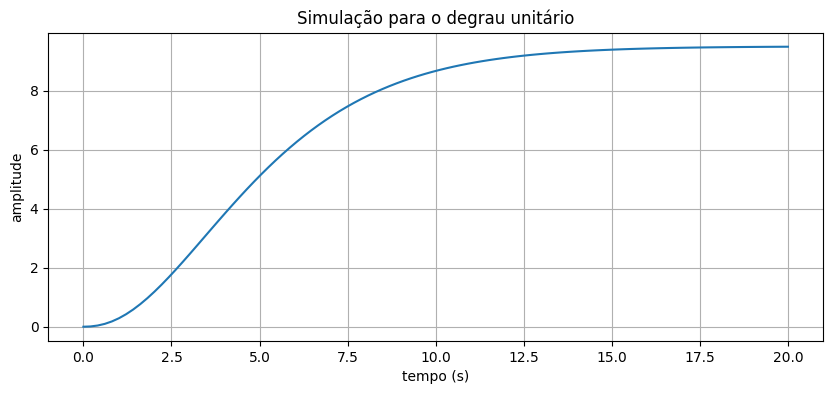

In [37]:
t, yout = ct.step_response(Gs, T=20)
plt.figure(figsize=(10, 4))
plt.plot(t, yout)
plt.title("Simulação para o degrau unitário")
plt.xlabel("tempo (s)")
plt.ylabel("amplitude")
plt.grid()
plt.show()


In [38]:
print("Dados da resposta ao degrau")
ct.step_info(Gs)

Dados da resposta ao degrau


{'RiseTime': 7.871401615765734,
 'SettlingTime': nan,
 'SettlingMin': 8.580768996155244,
 'SettlingMax': 9.499818349116001,
 'Overshoot': 0,
 'Undershoot': 0,
 'Peak': 9.262947259688579,
 'PeakTime': 13.207945084081485,
 'SteadyStateValue': 9.499818349116001}

## Controle Proporcional aplicado ao sistema G(s)

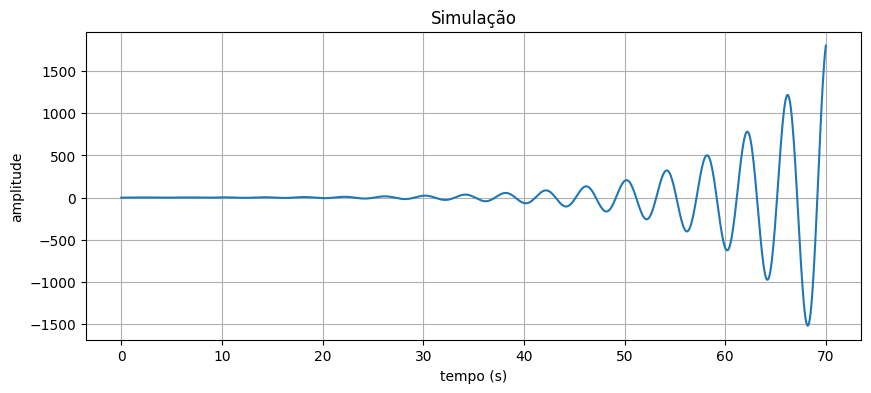

In [39]:
# Controlador proporcional
kp = 3
Cps = kp
Gmf = ct.feedback(Cps*Gs, 1, -1)
t1, y1 = ct.step_response(Gmf, T=70)

plt.figure(figsize=(10, 4))
plt.plot(t1, y1)
plt.title("Simulação")
plt.xlabel("tempo (s)")
plt.ylabel("amplitude")
plt.grid()
plt.show()


com o gráfico da simulação do sistema em malha fechada com controle proporcional, podemos ver que o sistema se torna instável, isso também é possível de analisar olhando para os pólos de malha fechda, eles estão no lado direito do plano complexo, ou seja, o sistema é instável para essa condição, dessa forma, podemos concluir que o controlador proporcional não é viável para ser aplicado a esse sistema.

In [40]:
print("\nPolos MF: ", ct.poles(Gmf))


Polos MF:  [-1.82846984+0.j          0.11083492+1.57019593j  0.11083492-1.57019593j]


In [41]:
ct.step_info(Gmf)

{'RiseTime': 0.7554511449720547,
 'SettlingTime': nan,
 'SettlingMin': -624.9059165710005,
 'SettlingMax': 781.4426474480815,
 'Overshoot': 80786.22120029063,
 'Undershoot': 64683.285922772164,
 'Peak': 781.4426474480815,
 'PeakTime': 62.1736292312001,
 'SteadyStateValue': 0.9661010687012708}

---

2. *Proponha especificações de desempenho em malha fechada com base na análise de malha aberta do item 1 (20%).*

## Espeficifações do projeto:

Ao analisar os dados obtidos na questão 2, podemos aplicar algumas melhorias, para o projeto, será usado os seguintes requisito.

- **Sobresinal $\le 3\%$**

O sobresinal será afetado ao aplicar um controle na planta, porém podemos definir um vamor maximo que o sistema pode ter de sobresinal, no caso desse projeto, vamos considerar que o sistema pode ter no máximo 3% de sobresinal.

- **Frequência natural: $w_n$ = $2w_{mad}$

$2w_{mad}$ = Frequencia natual do polo de malha aberta dominante

Além disso, podemos definir que a frequência natual dos pólos dominante, tenha um aganho, no caso, vamos considerar um ganho de 2 vezes a frequência natural do polo de malha aberta dominante.

Equação para encontrar o amortecimento em função do sobresial

$$
\begin{align}
    \xi &= \frac{-\ln{(\%UP/100)}}{\sqrt{\pi^2+\ln^2{(\%UP/100)}}}\\
\end{align}
$$

In [42]:
from IPython.display import display, Latex
wn = 2*0.5419
Up = 3
xi = (-np.log(Up/100))/(np.sqrt(np.pi**2+np.log(Up/100)**2))
display(Latex(f"$\\xi = {xi}$"))
p = -xi*wn+1j*wn*np.sqrt(1-xi**2)
display(Latex(f"$p_{{1,2}} = {np.real(p):.4f}\pm {np.imag(p):.4f}j$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

O sistema é de 3a ordem. Com o integrador ficará de 4a (antes do observador). Então, além dos dominantes, precisamos alocar mais dois polos. Vamos colocar um em cima do zero, para cancelar, e outro arbitrário real, 4x maior que a parte real do dominante.

In [43]:
polos_desejados = [p,np.conjugate(p),ct.zeros(Gs)[0],4*np.real(p)]
print(polos_desejados)
poli_mf = np.poly(polos_desejados)
print(poli_mf)

[(-0.8072180757057037+0.7232021973514605j), (-0.8072180757057037-0.7232021973514605j), (-3.6113861386138613+0j), -3.228872302822815]
[ 1.          8.45469459 23.87848763 26.86018424 13.69692538]


Então o polinômio desejado é:
$$
\begin{align}
    \alpha(s) &=s^4 + 8.45s^3 + 23.878s^2 + 26.86s + 13.69
\end{align}
$$

Vamos agora definir o sistema no espaço de estados usando FCC

In [44]:
F = np.block([[-den[1:]],[np.eye(2), np.zeros((2,1))]])
G = np.block([[1],[np.zeros((2,1))]])
H = np.block([[0,num]])
J = 0
n = F.shape[0]

F

array([[-1.6068    , -0.86048301, -0.15358188],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ]])

A partir das matrizes acima, podemos aumentar as matrizes para o projeto com integrador:

In [45]:
Fa = np.block([ [   F,   np.zeros((n,1)) ],
                [  -H,   0          ]])

Ga = np.block([[G], [0]])

print(Fa)
print("")
print(Ga)

[[-1.6068     -0.86048301 -0.15358188  0.        ]
 [ 1.          0.          0.          0.        ]
 [ 0.          1.          0.          0.        ]
 [-0.         -0.404      -1.459       0.        ]]

[[1.]
 [0.]
 [0.]
 [0.]]



Alocação de polos com integrador

In [46]:
Ka = ct.acker(Fa,Ga,polos_desejados)
K = Ka[:,0:n]
Ki = Ka[:,-1]
print(Ka)
print("")
print(K)
print("")
print(Ki)

[[ 6.84789459 23.01800462 22.9138965  -9.3878858 ]]

[[ 6.84789459 23.01800462 22.9138965 ]]

[-9.3878858]


Será usado Polos do observador reais e iguais, a um fator de 4 da parte real dos pólos dominantes:

In [47]:
po = 4*np.real(p)
#print(po)
L = ct.acker(F.T, H.T, [po]*n).T      # [po]*n = repete a lista n vezes, ou seja [po,po,po]
print("Ganhos do observador. L = ")
print(L)

Ganhos do observador. L = 
[[ 3.1470336 ]
 [11.07766597]
 [ 2.47048654]]


#### Equações do controlador

In [48]:
Fc = np.block([[F-G@K-L@H, np.zeros((n,1))],[np.zeros((1,n+1))]])
Gc = np.block([[L, np.zeros((n,1))],[np.array([-1,1])]])
Hc = -Ka
cont = ct.ss(Fc,Gc,Hc,0)
print(cont)

<LinearIOSystem>: sys[48]
Inputs (2): ['u[0]', 'u[1]']
Outputs (1): ['y[0]']
States (4): ['x[0]', 'x[1]', 'x[2]', 'x[3]']

A = [[-8.45469459e+00 -2.51498892e+01 -2.76590004e+01  0.00000000e+00]
     [ 1.00000000e+00 -4.47537705e+00 -1.61623147e+01  0.00000000e+00]
     [ 0.00000000e+00  1.92343936e-03 -3.60443986e+00  0.00000000e+00]
     [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

B = [[ 3.1470336   0.        ]
     [11.07766597  0.        ]
     [ 2.47048654  0.        ]
     [-1.          1.        ]]

C = [[ -6.84789459 -23.01800462 -22.9138965    9.3878858 ]]

D = [[0. 0.]]



#### Funções de transferência para o controlador

In [49]:
(ct.tf(cont))

TransferFunction([[array([ -342.53267945,  -914.29130015, -1537.43853598, -2134.35365208]), array([   9.3878858 ,  155.22410572, 1029.14311462, 2134.35365208])]], [[array([1.00000000e+00, 1.65345115e+01, 1.09624588e+02, 2.27351898e+02,
       3.12638804e-13]), array([1.00000000e+00, 1.65345115e+01, 1.09624588e+02, 2.27351898e+02,
       3.12638804e-13])]])


#### Simulação do sisnal de saída e de controle

In [50]:
Fmf = np.block([[F,-G@K,-G*Ki],[L@H,F-G@K-L@H,-G*Ki],[-H,np.zeros((1,n+1))]])
Gmf = np.block([[np.zeros((2*n,1))],[1]])
Hmf_y = np.block([[H,np.zeros((1,n+1))]])
Hmf_u = np.block([[-Ka,np.zeros((1,n))]])
Jmf = 0
MF_y = ct.ss(Fmf,Gmf,Hmf_y,Jmf)
MF_u = ct.ss(Fmf,Gmf,Hmf_u,Jmf)
#print(MF)
T=(ct.damp(MF_y))
print("")
print(ct.zeros(MF_y))

_____Eigenvalue______ Damping___ Frequency_
     -3.23+0.0006946j          1       3.23
     -3.23-0.0006946j          1       3.23
    -3.228+0.0006949j          1      3.228
    -3.228-0.0006949j          1      3.228
   -0.8072   +0.7232j     0.7448      1.084
   -0.8072   -0.7232j     0.7448      1.084
    -3.611                     1      3.611

[-3.22884927+3.98909905e-05j -3.22884927-3.98909905e-05j
 -3.22891837+0.00000000e+00j -3.61138614+0.00000000e+00j]


In [51]:
ct.step_info(MF_y)

{'RiseTime': 2.2157769504869185,
 'SettlingTime': 5.6540515288286874,
 'SettlingMin': 0.9032650852683004,
 'SettlingMax': 1.027721312136138,
 'Overshoot': 2.7721312136138048,
 'Undershoot': 0,
 'Peak': 1.027721312136138,
 'PeakTime': 4.737178307937549,
 'SteadyStateValue': 0.9999999999999999}

In [52]:
ts = 4/abs(np.real(p))
t, y = ct.step_response(MF_y,3*ts)
t, u = ct.step_response(MF_u,3*ts)


#### Gráfico do sinal de saída

1.027721686142029


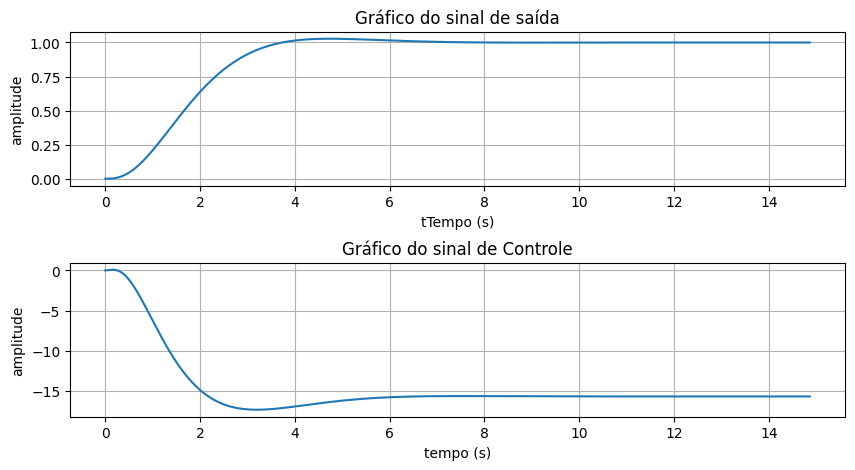

In [53]:
plt.figure(1, figsize=(10, 5))
plt.subplot(211)
plt.plot(t, y)
plt.title("Gráfico do sinal de saída")
plt.xlabel("tTempo (s)")
plt.ylabel("amplitude")
plt.grid()
print(np.max(y))

plt.subplot(212)
plt.plot(t, u)
plt.title("Gráfico do sinal de Controle")
plt.xlabel("tempo (s)")
plt.ylabel("amplitude")
plt.grid()

plt.subplots_adjust(hspace=0.5)
plt.show()

O projeto de controle foi bem sucedido na medida que ao analisar os gráficos de simulação, podemos concluir que o erro em regime é nulo, além de que ao aplicar a função **ct.step_info(MF_y)** temos os requisitos de projeto atendidos, obtendo um sobresinal de 2,77%, e uma frequência Natual dos polos dominantes de 1.084 que é aproximadamente 2 a frequência natural dos polos dominantes de malha aberta.

Dessa forma, pode-se afirmar que o projeto foi bem sucedido nos aspectos relacionados ao cumprimento dos requisitos de projeto.